In [217]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

from lib.image_processing import find_borders

%matplotlib inline

In [186]:
def imshow_all(images):
    _, ax = plt.subplots(1, len(images), figsize=(20,6))
    for index, img in enumerate(images):
        ax[index].imshow(img, cmap='gray')
    plt.show()

In [220]:
night_img = cv2.imread('./test_assets/night_1.png')
day_img = cv2.imread('./test_assets/day_1.png')

canvas_night = cv2.cvtColor(night_img, cv2.COLOR_BGR2GRAY)
canvas_day = cv2.cvtColor(day_img, cv2.COLOR_BGR2GRAY)

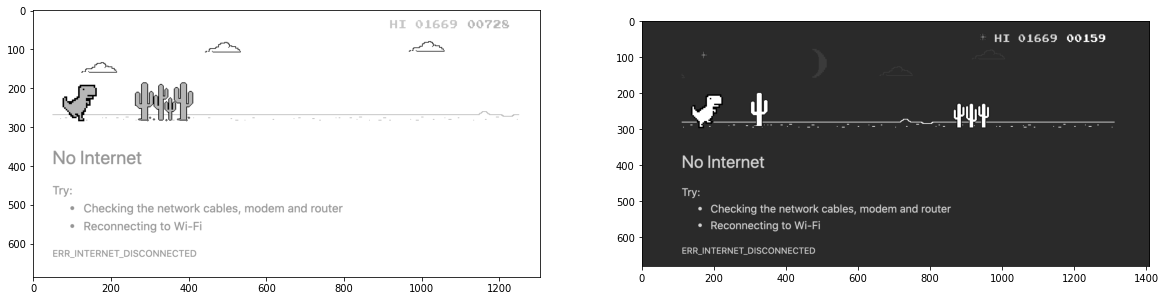

In [188]:
imshow_all([canvas_day,canvas_night])

In [189]:
print(np.median(canvas_day), np.median(canvas_night))

255.0 30.0


Loading a templare with `dino` to perform a search and detect bounderies on the canvas

In [218]:
# using Canny edge detection on the whole range from 0 to 255
canny_day = find_borders(canvas_day)
canny_night = find_borders(canvas_night)

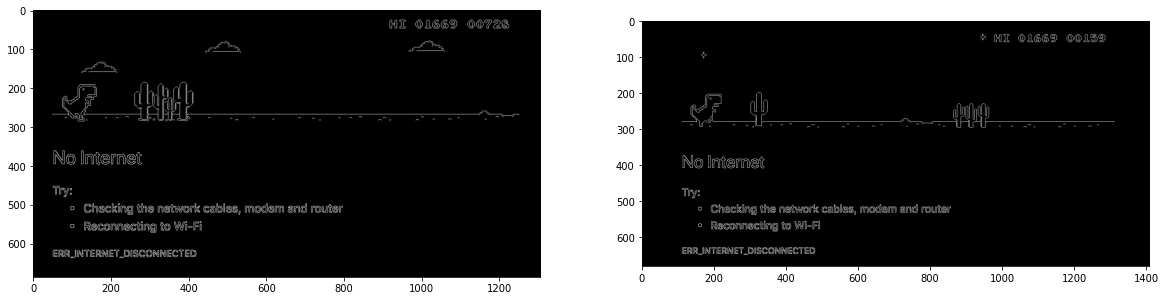

In [219]:
imshow_all([canny_day, canny_night])

In [145]:
dino_template = cv2.imread('./assets/dino_crop.png')
dino_template = cv2.cvtColor(dino_template, cv2.COLOR_BGR2GRAY)

In [167]:
dino_bordered_template = cv2.Canny(dino_template, threshold1=0, threshold2=255)

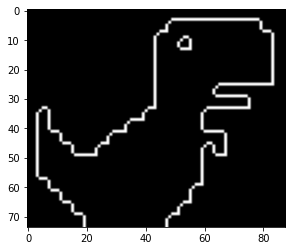

In [247]:
plt.imshow(dino_bordered_template, cmap='gray')

In [249]:
dino_bordered_template.shape

(74, 88)

In [221]:
match_res = cv2.matchTemplate(canny_day, dino_bordered_template, cv2.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(match_res)

In [222]:
print(max_val, max_loc)

0.7367040514945984 (76, 192)


In [223]:
dino_h, dino_w = dino_bordered_template.shape

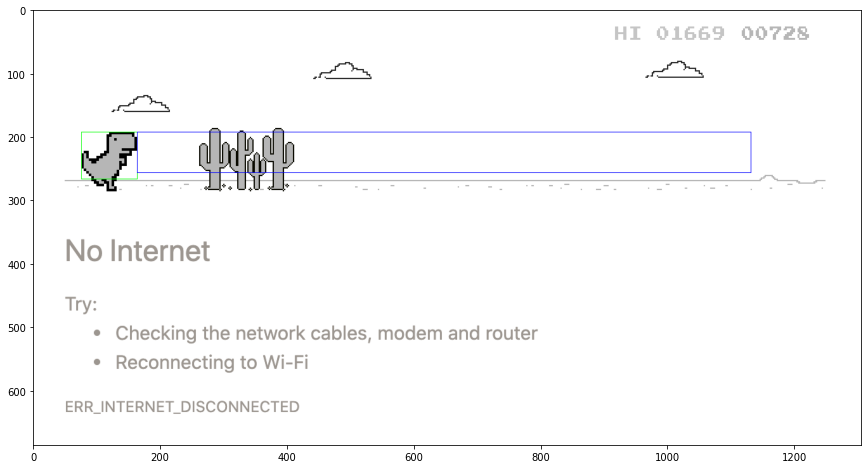

In [232]:
canvas_day_with_dino = day_img.copy()
dino_size = dino_bordered_template.shape
bottom_right = (max_loc[0] + dino_w, max_loc[1] + dino_h)
cv2.rectangle(canvas_day_with_dino, max_loc, bottom_right, (0, 255, 0))

# [(top_x, topy), (bottom_x, bottom_y)]
region_to_watch_after = [(max_loc[0] + dino_w, max_loc[1]), (max_loc[0] + 12 * dino_w, max_loc[1] + dino_h - 10)]
cv2.rectangle(canvas_day_with_dino, region_to_watch_after[0], region_to_watch_after[1], (0, 0, 255))

plt.figure(figsize=(16,8))
plt.imshow(canvas_day_with_dino)

In [235]:
workin_region = canny_day.copy()
(top_x, top_y), (bottom_x, bottom_y) = region_to_watch_after
workin_region = workin_region[top_y:bottom_y, top_x: bottom_x]
workin_region.shape

(64, 968)

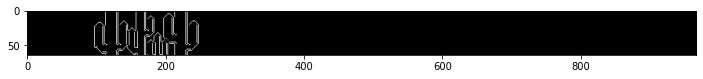

In [244]:
plt.figure(figsize=(12,3))
plt.imshow(workin_region, cmap='gray')

In [253]:
location_group = []
step = 5
_, region_w = workin_region.shape
located_group = False
steps = region_w // step

for i in range(steps):
    start = step * i
    asdf = workin_region[:, start:start+step]
    print(f'Step {i} with max val {asdf.max()}')

Step 0 with max val 0
Step 1 with max val 0
Step 2 with max val 0
Step 3 with max val 0
Step 4 with max val 0
Step 5 with max val 0
Step 6 with max val 0
Step 7 with max val 0
Step 8 with max val 0
Step 9 with max val 0
Step 10 with max val 0
Step 11 with max val 0
Step 12 with max val 0
Step 13 with max val 0
Step 14 with max val 0
Step 15 with max val 0
Step 16 with max val 0
Step 17 with max val 0
Step 18 with max val 0
Step 19 with max val 255
Step 20 with max val 255
Step 21 with max val 255
Step 22 with max val 255
Step 23 with max val 255
Step 24 with max val 0
Step 25 with max val 255
Step 26 with max val 255
Step 27 with max val 255
Step 28 with max val 255
Step 29 with max val 255
Step 30 with max val 255
Step 31 with max val 255
Step 32 with max val 255
Step 33 with max val 255
Step 34 with max val 255
Step 35 with max val 255
Step 36 with max val 255
Step 37 with max val 255
Step 38 with max val 255
Step 39 with max val 255
Step 40 with max val 255
Step 41 with max val 255
